# Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization Summary

### [Article](https://arxiv.org/pdf/1610.02391.pdf)

## Authors

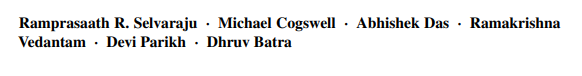

### Abstract

The article proposes a technique for producing ‘visual explanations’ for decisions from a large class of Convolutional Neural Network (CNN)-based models, making them more transparent and explainable.

The approach – Gradient-weighted Class Activation Mapping (Grad-CAM), uses the gradients of any target concept (say ‘dog’ in a classification network or a sequence of words in captioning network) flowing into the final convolutional layer to produce a coarse localization map highlighting the important regions in the image for predicting the concept.

Unlike previous approaches, Grad-CAM is applicable to a wide variety of CNN model-families: CNNs with fullyconnected layers (e.g. VGG), CNNs used for structured outputs (e.g. captioning), CNNs used in tasks with multimodal inputs (e.g. visual question answering) or reinforcement learning, all without architectural changes or re-training. This research combines Grad-CAM with existing fine-grained visualizations to create a high-resolution class-discriminative visualization, Guided Grad-CAM, and apply it to image classification, image captioning, and visual question answering (VQA) models, including ResNet-based architectures.
It aims to devise a way to identify important neurons through GradCAM and combine it with neuron names to provide textual explanations for model decisions. 

### Introduction
Interpretability matters. In order to build trust in intelligent systems and move towards their meaningful integration into our everyday lives, it is clear that we must build ‘transparent’ models that have the ability to explain why they predict what they predict. The goal of transparency and explanations is to identify the failure modes, thereby helping researchers focus their efforts on the most fruitful research directions. 

By using deep models, we sacrifice interpretable modules for uninterpretable ones that achieve greater performance through greater abstraction (more layers) and tighter integration (end-to-end training). As such, deep models are beginning to explore the spectrum between interpretability and accuracy.

Zhou et al. recently proposed a technique called Class Activation Mapping (CAM) for identifying discriminative regions used by a restricted class of image classification CNNs which do not contain any fully-connected layers. In essence, this work trades off model complexity and performance for more transparency into the working of the model. In contrast, this research makes existing state of-the-art deep models interpretable without altering their architecture, thus avoiding the interpretability vs. accuracy trade-off.

This article shows that it is possible to fuse existing pixel-space gradient visualizations with Grad-CAM to create Guided Grad-CAM visualizations that are both high-resolution and class-discriminative. As a result, important regions of the image which correspond to any decision of interest are visualized in high-resolution detail even if the image contains evidence for multiple possible concepts (dog and cat in the below example).

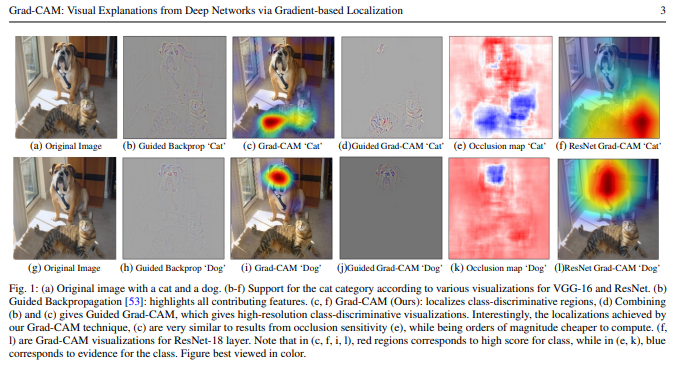







### Related Work
Most relevant to this approach is the Class Activation Mapping (CAM) approach to localization. This approach modifies image classification CNN architectures replacing fully-connected layers with convolutional layers and global average pooling, thus achieving class-specific feature maps. 

A drawback of CAM is that it requires feature maps to directly precede softmax layers, so it is only applicable to a particular kind of CNN architectures performing global average pooling over convolutional maps immediately prior to prediction (i.e. conv feature maps → global average pooling → softmax layer). Such architectures may achieve inferior accuracies compared to general networks on some tasks (e.g. image classification) or may simply be inapplicable to any other tasks (e.g. image captioning or VQA). Grad-CAM introduces a new way of combining feature maps using the gradient signal that does not require any modification in the network architecture. This allows Grad_CAM to be applied to off-the-shelf CNN-based architectures, including those for image captioning and visual question answering. For a fully-convolutional architecture, CAM is a special case of Grad-CAM. 

Unlike prior work, to achieve localization Grad-CAM only requires a single forward and a partial backwards pass of an image and is thus typically an order of magnitude more efficient. 



### Grad-CAM


Convolutional layers naturally retain spatial information which is lost in fully-connected layers, so we can expect the last convolutional layers to have the best compromise between high-level semantics and detailed spatial information. The neurons in these layers look for semantic class-specific information in the image (say object parts). Grad-CAM uses the gradient information flowing into the last convolutional layer of the CNN to assign importance values to each neuron for a particular decision of interest.

\begin{align}
        ACC(m) × [LAT(m)/T AR^]{w}
    \end{align}

$E = mc^2$.

In order to obtain the class-discriminative localization map $Grad-CAM L_{Grad-CAM}^c ∈ R^{u×v}$ of width u and height v for any class c, we first compute the gradient of the score for class c, $y^c$ (before the softmax), with respect to feature map activations Ak of a convolutional layer, i.e. $\frac{∂yc}{∂Ak}$ .These gradients flowing back are global-average-pooled 2 over the width and height dimensions (indexed by i and j respectively) to obtain the neuron importance weights $α_{k}^c$ : 
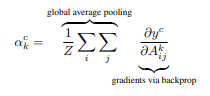

During computation of $α_{k}^c$ while backpropagating gradients with respect to activations, the exact computation amounts to successive matrix products of the weight matrices and the gradient with respect to activation functions till the final convolution layer that the gradients are being propagated to. Hence, this weight $α_{k}^c$ represents a partial linearization
of the deep network downstream from A, and captures the ‘importance’ of feature map k for a target class c. We perform a weighted combination of forward activation maps, and follow it by a ReLU to obtain: 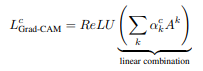

ReLU is applied to the linear combination of maps because we are only interested in the features that have a positive influence on the class of interest, i.e. pixels whose intensity should be increased in order to increase $y^c$. Negative pixels are likely to belong to other categories in the image. As expected, without this ReLU, localization maps sometimes highlight more than just the desired class and perform worse at localization.

#### Grad-CAM generalizes CAM
CAM produces a localization map for an image classification CNN with a specific kind of architecture where global average
pooled convolutional feature maps are fed directly into softmax. Specifically, let the penultimate layer produce K feature
maps, $A^k ∈ R^{u×v}$, with each element indexed by i, j. So $A_{ij}^k$ refers to the activation at location (i, j) of the feature map $A^k$. These feature maps are then spatially pooled using Global Average Pooling (GAP) and linearly transformed to
produce a score $Y^c$ for each class c,
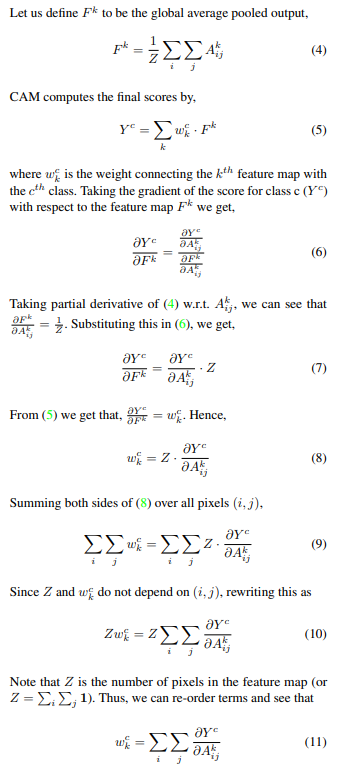

Up to a proportionality constant (1/Z) that gets normalizedout during visualization, the expression for $w_{k}^c$ is identical to α_{k}^c used by Grad-CAM. Thus, Grad-CAM is a strict generalization of CAM. This generalization allows it to generate visual explanations from CNN-based models that cascade convolutional layers with much more complex interactions.


#### Guided Grad-CAM

While Grad-CAM is class-discriminative and localizes relevant image regions, it lacks the ability to highlight finegrained details like pixel-space gradient visualization methods (Guided Backpropagation, Deconvolution). Guided Backpropagation visualizes gradients with respect to the image where negative gradients are suppressed when backpropagating through ReLU layers. Intuitively, this aims to capture pixels detected by neurons, not the ones that suppress neurons. In order to combine the best aspects of both, the research fuses together Guided Backpropagation and Grad-CAM visualizations via element-wise multiplication. This visualization is both high-resolution (when the class of interest is ‘tiger
cat’, it identifies important ‘tiger cat’ features like stripes, pointy ears and eyes) and class-discriminative (it highlights
the ‘tiger cat’ but not the ‘boxer (dog)’).


#### Counterfactual explanation

Using a slight modification to Grad-CAM, we can obtain explanations that highlight support for regions that would make the network change its prediction. As a consequence, removing concepts occurring in those regions would make the model more confident about its prediction. 

Specifically, we negate the gradient of $y^c$ (score for class c) with respect to feature maps A of a convolutional layer. Thus
the importance weights $α_{k}^c$ now become: 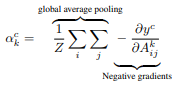


###  Evaluating Localization Ability of Grad-CAM

#### Weekly supervised localization
The ImageNet localization challenge requires approaches to provide bounding boxes in addition to classification labels. Given an image, we first obtain class predictions from our network and then generate Grad-CAM maps for each of the predicted classes and binarize them with a threshold of 15% of the max intensity. This results in connected segments of pixels and we draw a bounding box around the single largest segment.

Following ILSVRC-15 evaluation, both top-1 and top-5 localization errors on the val set are reported: 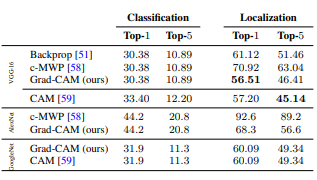

Grad-CAM localization errors are significantly better than those achieved by c-MWP, which use grab-cut to post-process image space gradients into heat maps. Grad-CAM for VGG-16 also achieves better top-1 localization error than CAM, which requires a change in the model architecture, necessitates re-training and thereby achieves worse classification errors (2.98% worse top-1), while Grad-CAM does not compromise on classification performance.

#### Weakly-supervised Segmentation

Semantic segmentation involves the task of assigning each pixel in the image an object class (or background class). The task of weakly-supervised segmentation involves segmenting objects with just image-level annotation, which can be obtained relatively cheaply from image classification datasets. 

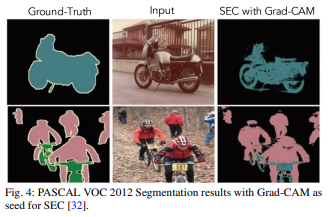



### Evaluating Visualizations


Experiments were conducted to understand the interpretability vs. faithfulness tradeoff of our approach to model predictions.
The first human study evaluates the main premise of the Grad-CAM approach – are Grad-CAM visualizations more class discriminative than previous techniques? Having established that, we turn to understanding whether it can lead an end user to trust the visualized models appropriately. For these experiments, comparisons were made between VGG-16 and AlexNet finetuned on PASCAL VOC 2007 train and visualizations evaluated on val.

#### Evaluating Class Discrimination
Intuitively, a good prediction explanation is one that produces discriminative visualizations for the class of interest. The experiment was conducted using 4 visualizations (Deconvolution, Guided Backpropagation, GRAD-CAM and Guided Grad-CAM) for 90 image-category pairs. 9 ratings were collected for each image, evaluated against the ground truth and averaged to obtain the accuracy.

When viewing Guided Grad-CAM, human subjects can correctly identify the category being visualized in 61.23% of cases (compared to 44.44% for Guided Backpropagation; thus, Grad-CAM improves human performance by 16.79%). Similarly, it was found that Grad-CAM helps make Deconvolution more class-discriminative (from 53.33% → 60.37%). Guided Grad-CAM performs the best among all methods.
 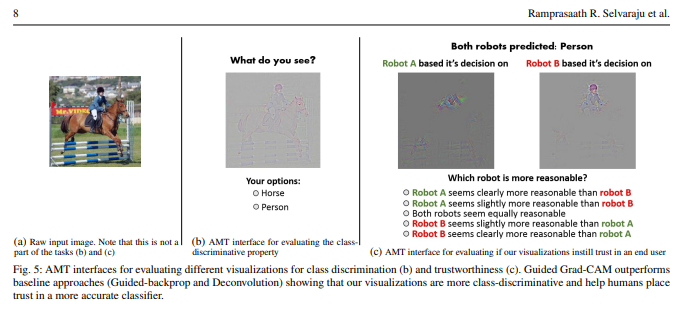

#### Evaluating test

Given two prediction explanations, we evaluate which seems more trustworthy. AlexNet and VGG-16 are used to compare
Guided Backpropagation and Guided Grad-CAM visualizations, noting that VGG-16 is known to be more reliable than AlexNet with an accuracy of 79.09 mAP (vs. 69.20 mAP) on PASCAL classification.  Given a visualization from AlexNet and one from VGG-16, and the predicted object category, 54 AMT workers were instructed to rate the reliability of the models relative to each other on a scale of clearly more/less reliable (+/-2), slightly more/less reliable (+/-1), and equally reliable (0). To eliminate any biases, VGG-16 and AlexNet were assigned to be ‘model-1’ with approximately equal probability.  The study finds that human subjects are able to identify the more accurate classifier (VGG-16 over AlexNet) simply from the prediction explanations, despite both models making identical predictions. With Guided Backpropagation, humans assign VGG-16 an average score of 1.00 which means that it is slightly more reliable than AlexNet, while Guided Grad-CAM achieves a higher score of 1.27 which is closer to saying that VGG-16 is clearly more reliable. 

#### Faithfulness vs. Interpretability

Faithfulness of a visualization to a model is its ability to accurately explain the function learned by the model. Naturally,
there exists a trade-off between the interpretability and faithfulness of a visualization – a more faithful visualization is
typically less interpretable and vice versa. In fact, one could argue that a fully faithful explanation is the entire description of the model, which in the case of deep models is not interpretable/easy to visualize. One expectation is that the explanations should be locally accurate, i.e. in the vicinity of the input data point, the explanation should be faithful to the model. Grad-CAM is more faithful to the original model compared to prior methods.  Through localization experiments and human studies, we see that Grad-CAM visualizations are more interpretable, and through correlation with occlusion maps, we see that Grad-CAM is more faithful to the model.


### Diagnosing image classification CNNs with Grad-CAM


#### Analyzing failure modes for VGG16 
In order to see what mistakes a network is making, we first get a list of examples that the network (VGG-16) fails to
classify correctly. For these misclassified examples, Guided Grad-CAM is used to visualize both the correct and the predicted class.

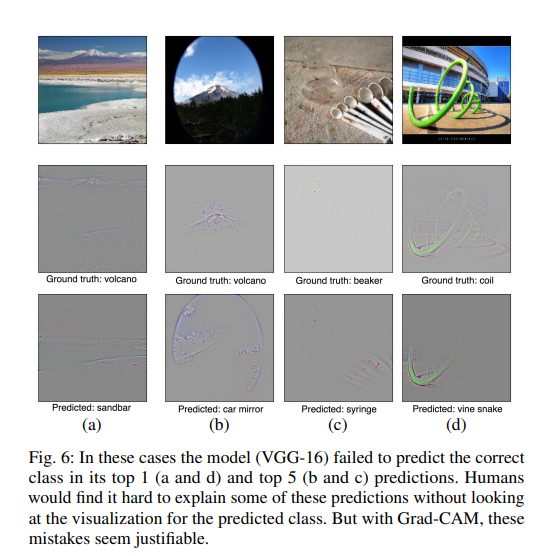

Some failures are due to ambiguities inherent in ImageNet classification. We can also see that seemingly unreasonable predictions have reasonable explanations.


#### Effect of adversarial noise on VGG-16

Adversarial images for an ImageNet-pretrained VGG-16 are generated such that it assigns high probability (> 0.9999) to a category that is not present in the image and low probabilities to categories that are present. Grad-CAM
visualizations for the categories that are present is then computed. Despite the network being certain about the absence
of these categories (‘tiger cat’ and ‘boxer’), Grad-CAM visualizations can correctly localize them. This shows that
Grad-CAM is fairly robust to adversarial noise.

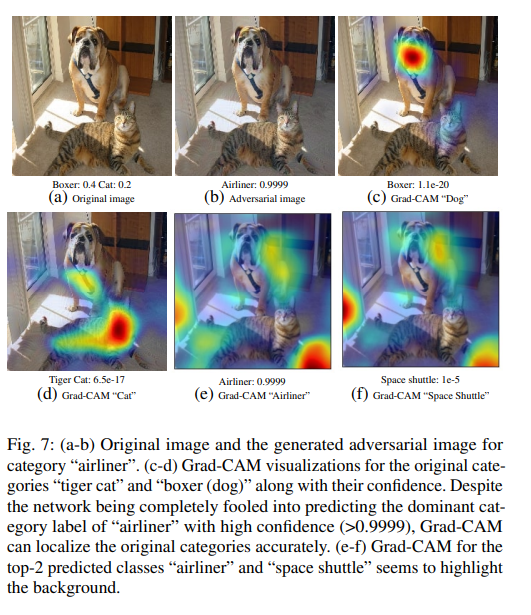

####  Identifying bias in dataset

 Models trained on biased datasets may not generalize to real-world scenarios, or worse, may perpetuate biases and stereotypes
(w.r.t. gender, race, age, etc.). ImageNetpretrained VGG-16 model is finetuned for a “doctor” vs. “nurse” binary classification task. The training and validation splits are built using the top 250 relevant images (for each class) from a
popular image search engine. And the test set was controlled to be balanced in its distribution of genders across the two classes. Although the trained model achieves good validation accuracy, it does not generalize well (82% test accuracy).
Grad-CAM visualizations of the model predictions revealed
that the model had learned to look at the person’s face / hairstyle to distinguish nurses from doctors, thus learning a gender stereotype. Indeed, the model was misclassifying several female doctors to be a nurse and male nurses to be a doctor. 
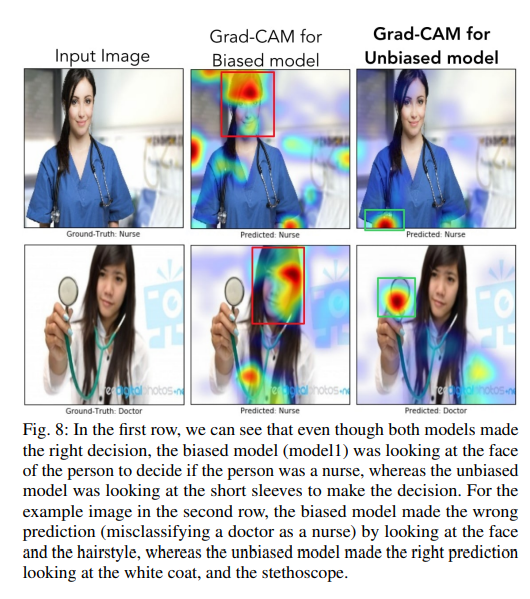

Through these intuitions gained from Grad-CAM visualizations, the bias in the training set can be reduced by adding in images
of male nurses and female doctors, while maintaining the same number of images per class as before. The re-trained model not only generalizes better (90% test accuracy), but also looks at the right regions. This experiment demonstrates a proof-of-concept that Grad-CAM can help detect and remove biases in datasets.






### Textual Explanations with Grad-CAM

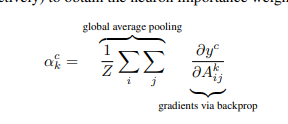

This equation gives a way to obtain neuron-importance, α, for each neuron in a convolutional layer for a particular class. Higher positive values of the neuron importance indicate that the presence of that concept leads to an increase in the class score, whereas higher negative values indicate that its absence leads to an increase in the score for the class.

 Bau et al. proposed an approach to automatically name neurons in any convolutional layer of a trained network. These names indicate concepts that the neuron looks for in an image. Using their approach, neuron names can be obtained for the last convolutional layer. Next, we sort and obtain the top-5 and bottom-5 neurons based on their class-specific importance scores, $α_k$. The names for these neurons can be used as text explanations.
 
 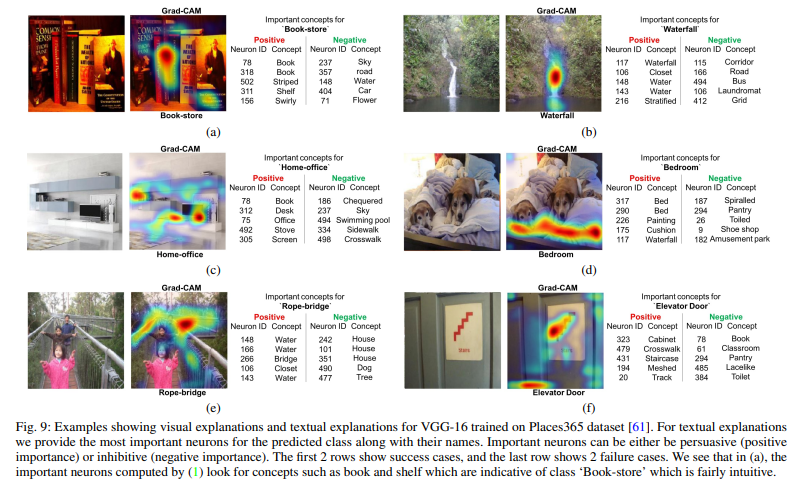
 
In (a), the positively important neurons computed by (1) look for intuitive concepts such as book and shelf that are indicative of the class ‘Book-store’.  In (b), for predicting ‘waterfall’, both visual and textual explanations highlight ‘water’ and ‘stratified’ which are descriptive of ‘waterfall’ images. (e) is a failure case due to misclassification as the network predicted ‘rope-bridge’ when there is no rope, but still the important concepts (water and bridge) are indicative of the predicted class. In (f), while Grad-CAM correctly looks at the door and the staircase on the paper to predict ‘Elevator door’, the neurons detecting doors did not pass the IoU threshold7 of 0.05 (chosen in order to suppress the noise in the neuron names), and hence are not part of the textual explanations.



### Grad-CAM for Image Captioning and VQA

Existing visualization techniques either are not class-discriminative (Guided Backpropagation, Deconvolution), or simply cannot be used for these tasks/architectures, or both (CAM, c-MWP).

#### 8.1 Image Captioning

Grad-CAM is built on top of the publicly available neuraltalk28 implementation [31] that uses a finetuned VGG-16 CNN for images and an LSTM-based language model for the purposes of this research. Given a caption, the gradient of its log probability w.r.t. units is computed in the last convolutional layer of the CNN (conv5_3 for VGG16) and generate Grad-CAM visualizations.

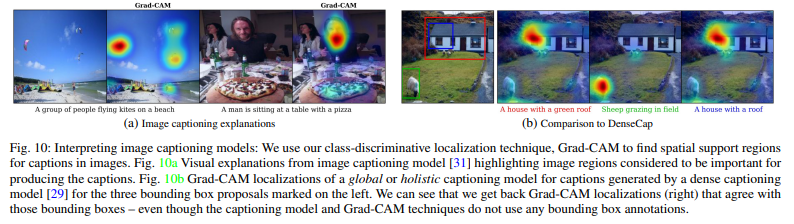

Grad-CAM maps for the generated caption localize every occurrence of both the kites and people despite their relatively small size. Grad-CAM correctly highlights the pizza and the man, but ignores the woman nearby, since ‘woman’ is not mentioned in the caption. 


### Conclusion

The Grad-CAM visualizations outperform existing approaches on both axes – interpretability and faithfulness to original model. Extensive human studies reveal that these visualizations can discriminate between classes more accurately, better expose the trustworthiness of a classifier, and help identify biases in datasets. Further, the research devises a way to identify important neurons through Grad-CAM and provide a way to obtain textual explanations for model decisions. Finally, it show the broad applicability of Grad-CAM to various off-the-shelf architectures for tasks such as image classification, image captioning and visual question answering.

### Reproduction

For this demonstration i have taken a Grad-CAM implementation from https://keras.io/examples/vision/grad_cam/. I have used this same Grad-CAM implementation in my course project but with my own custom model.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

4227072/4217496 [==============================] - 0s 0us/step


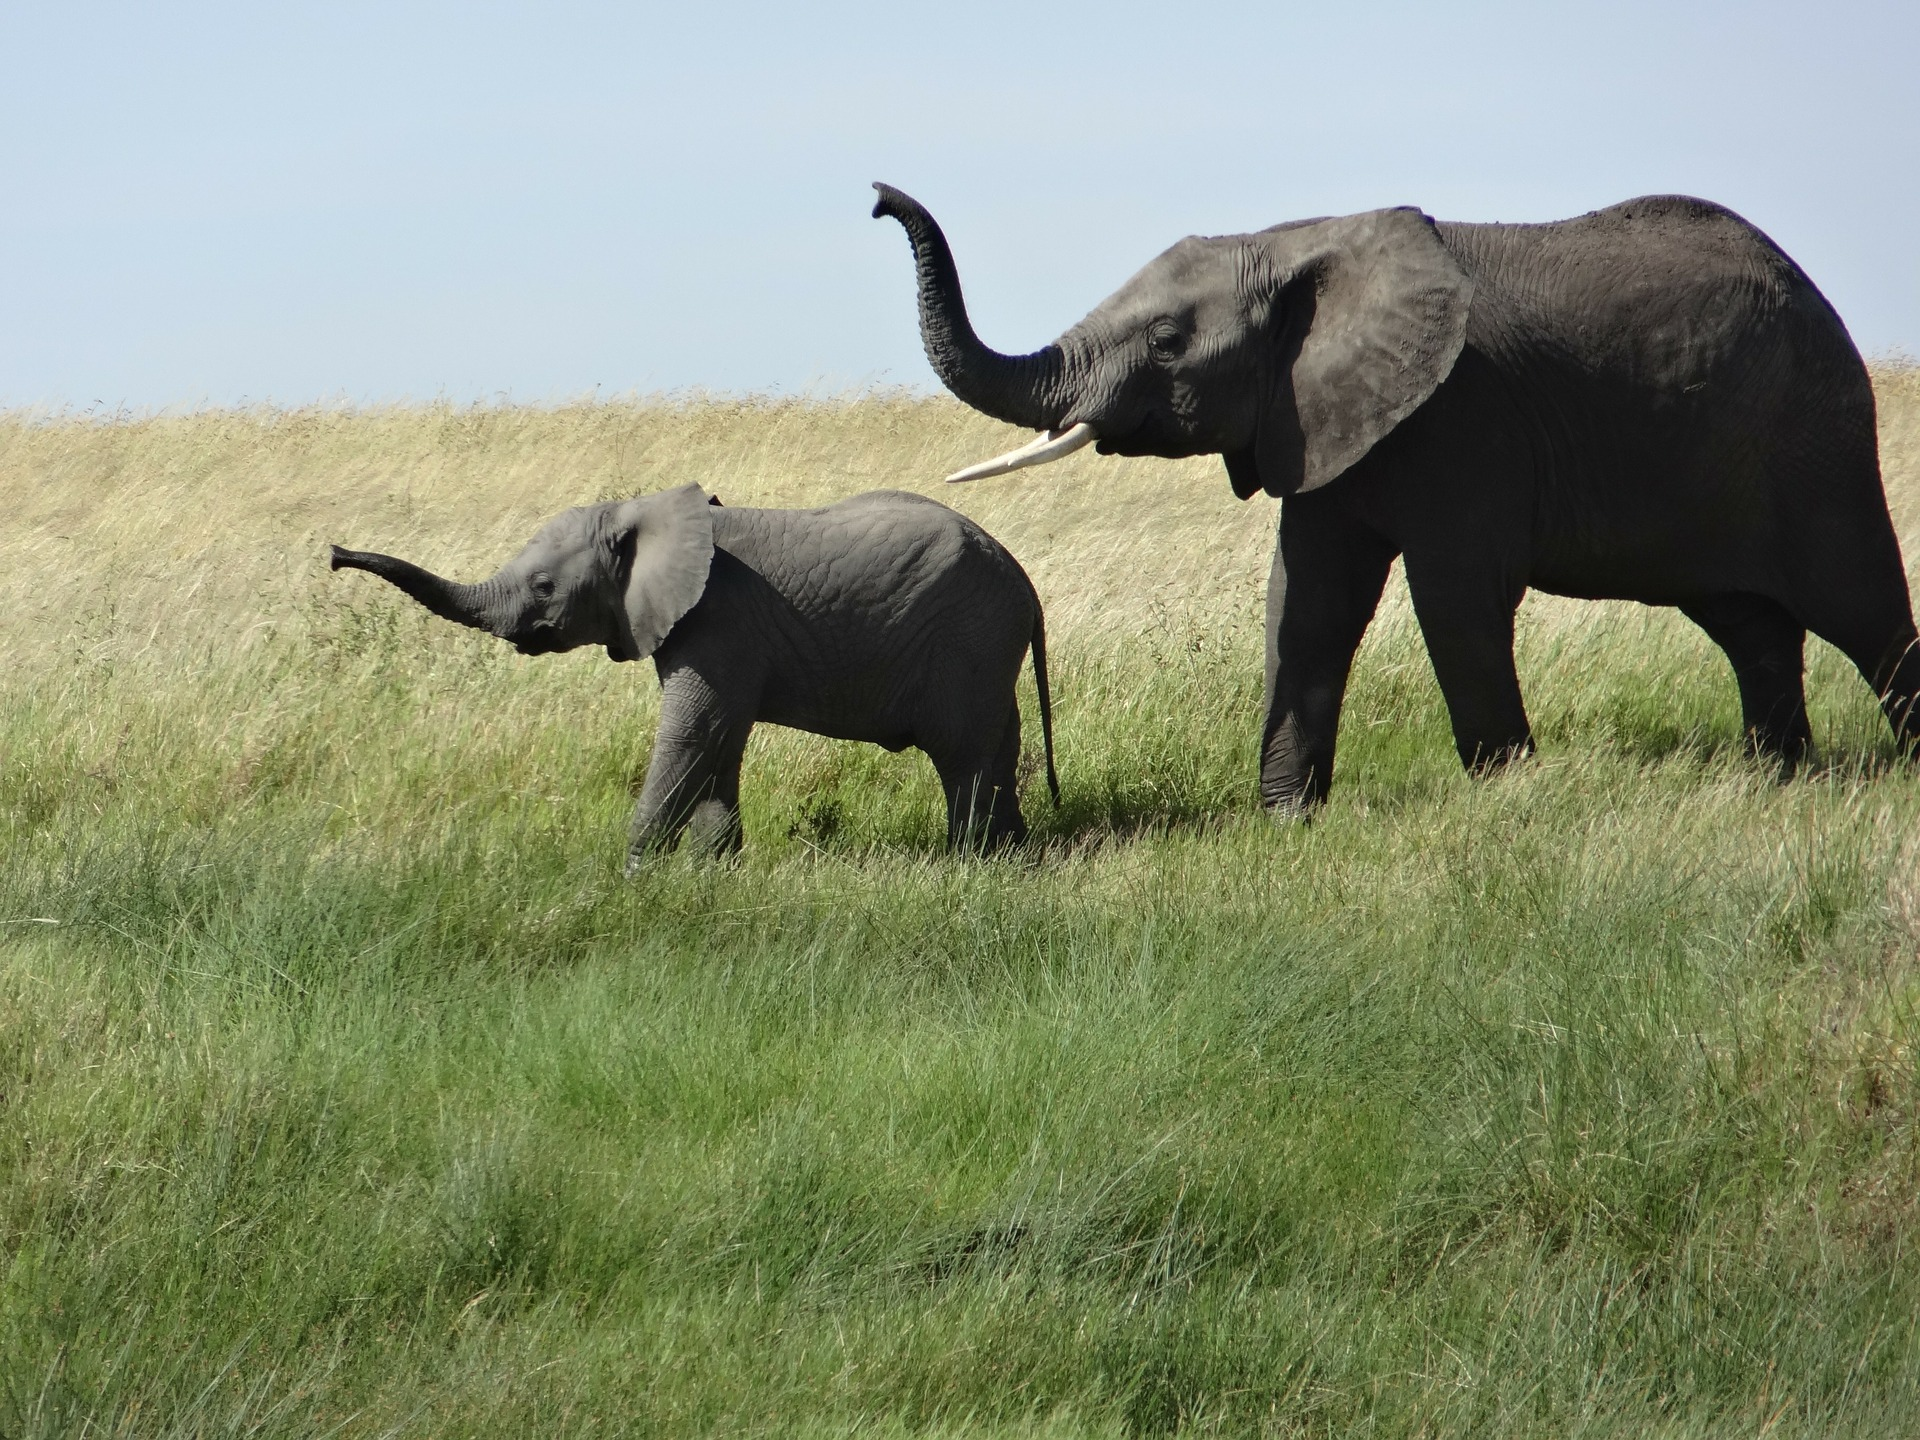

In [3]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

# The local path to our target image
img_path = keras.utils.get_file(
    "african_elephant.jpg", "https://i.imgur.com/Bvro0YD.png"
)

display(Image(img_path))

In [4]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

49152/35363 [=========================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 9.862388)]


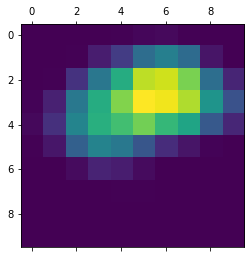

In [5]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

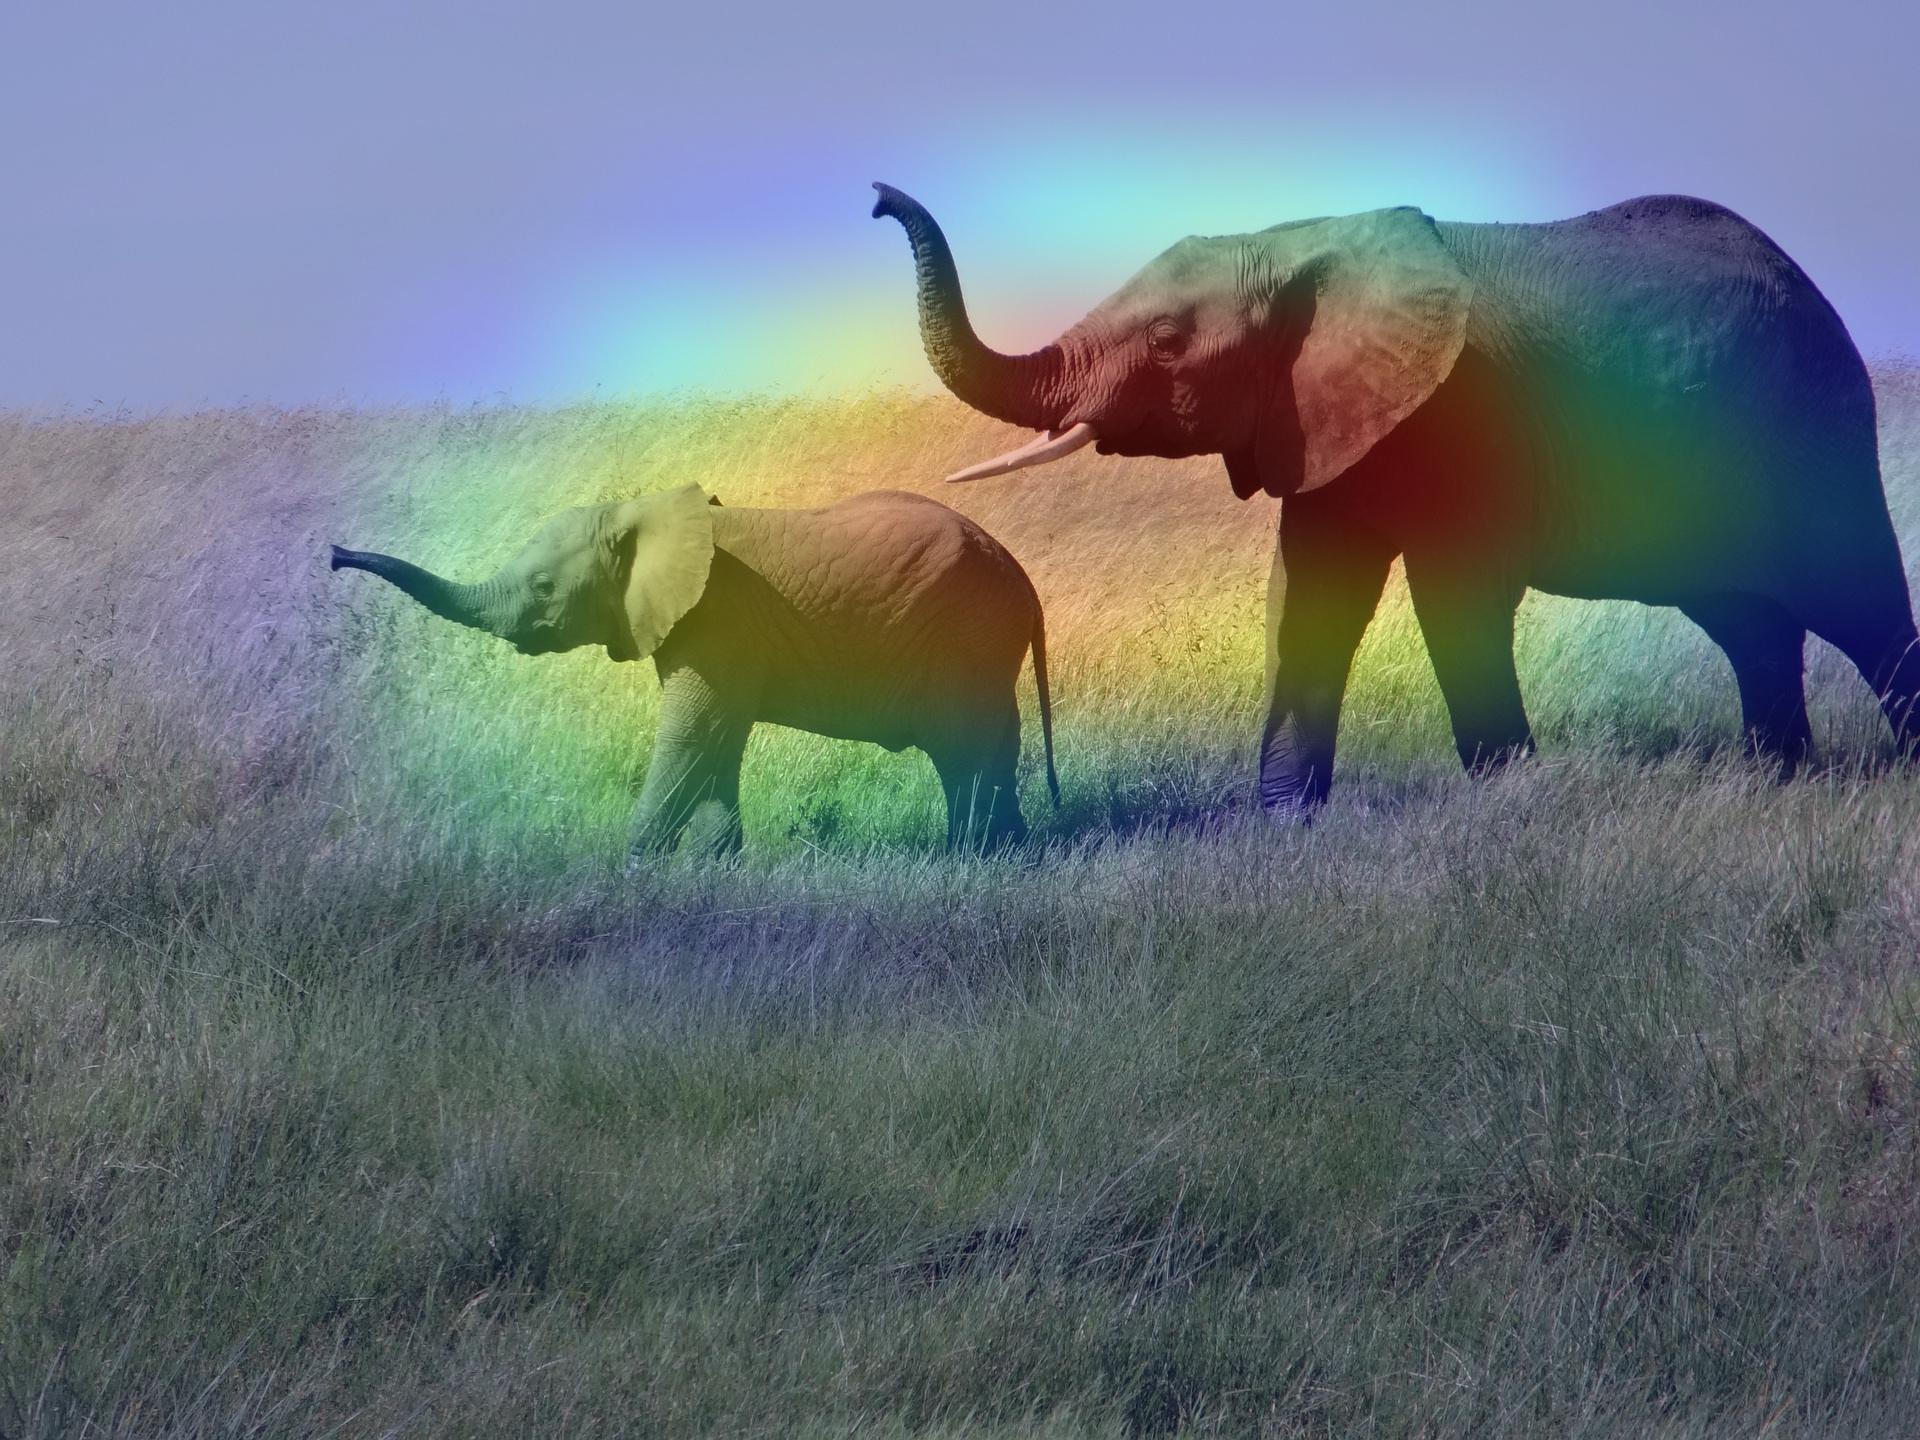

In [6]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

81920/72452 [=================================] - 0s 0us/step


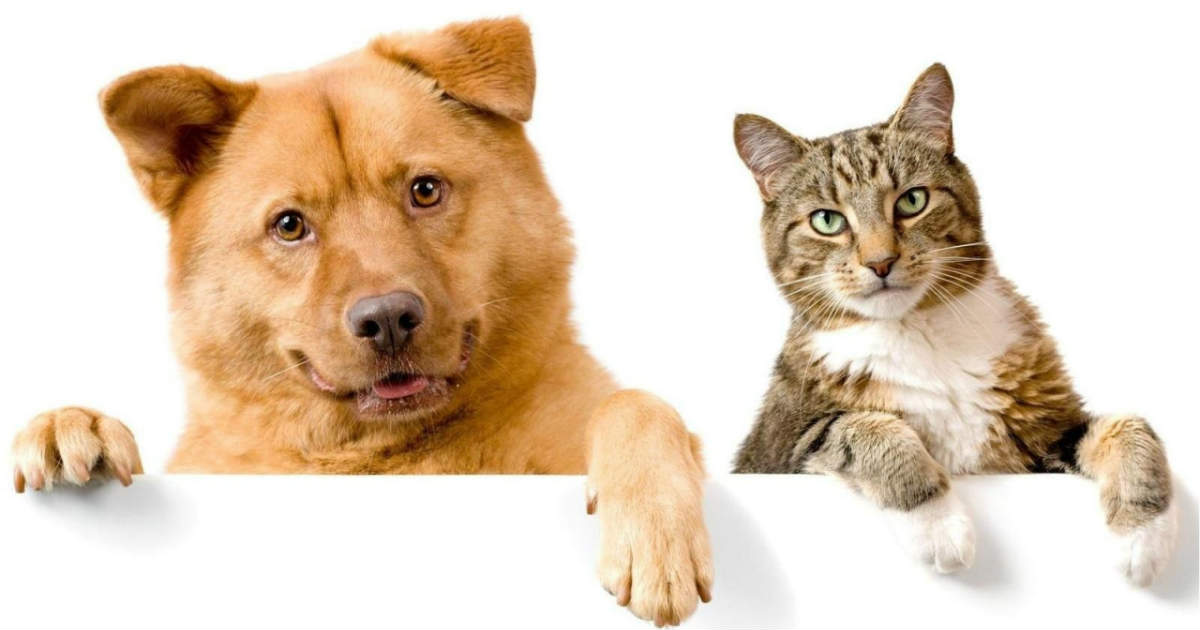

Predicted: [('n02112137', 'chow', 4.6112423), ('n02124075', 'Egyptian_cat', 4.3817368)]


In [7]:
img_path = keras.utils.get_file(
    "cat_and_dog.jpg",
    "https://storage.googleapis.com/petbacker/images/blog/2017/dog-and-cat-cover.jpg",
)

display(Image(img_path))

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Print what the two top predicted classes are
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=2)[0])

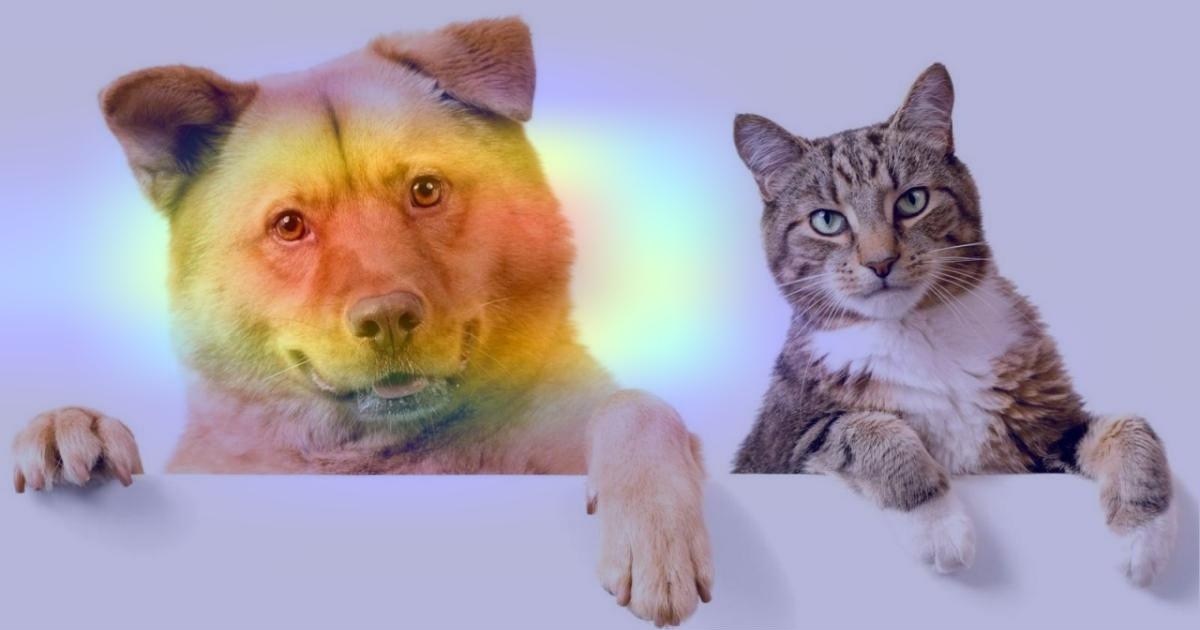

In [8]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=260)

save_and_display_gradcam(img_path, heatmap)

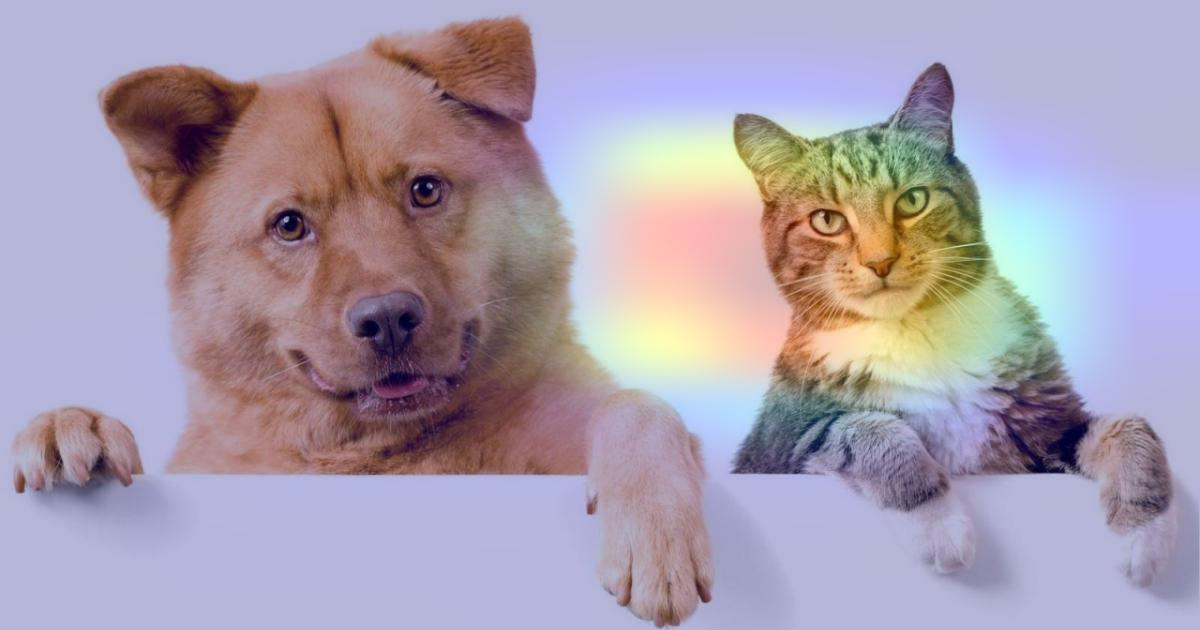

In [9]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=285)

save_and_display_gradcam(img_path, heatmap)